# Tarea 3 - Miguel Rios Tangarife - Modelo B

In [1]:
import glob
import seaborn as sns
import pandas as pd
import matplotlib.image as img
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
import cv2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import numpy as np
from  sklearn.linear_model import LogisticRegression
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
desire_size = (90,90)
n_channels = 3
batch_size = 500
train_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size)

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 4253 files belonging to 11 classes.
Using 3403 files for training.
Found 4253 files belonging to 11 classes.
Using 850 files for validation.


Debemos validar que si estén las 11 carpetas de train

**Nota**: La carpeta Shepherd's Purse en un inicio no era leida correctamente, esto 
se debe a el apostrofe en **Shepherd's**, una vez retirado el apostrofe si se reconoce.

In [3]:
print(class_names)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


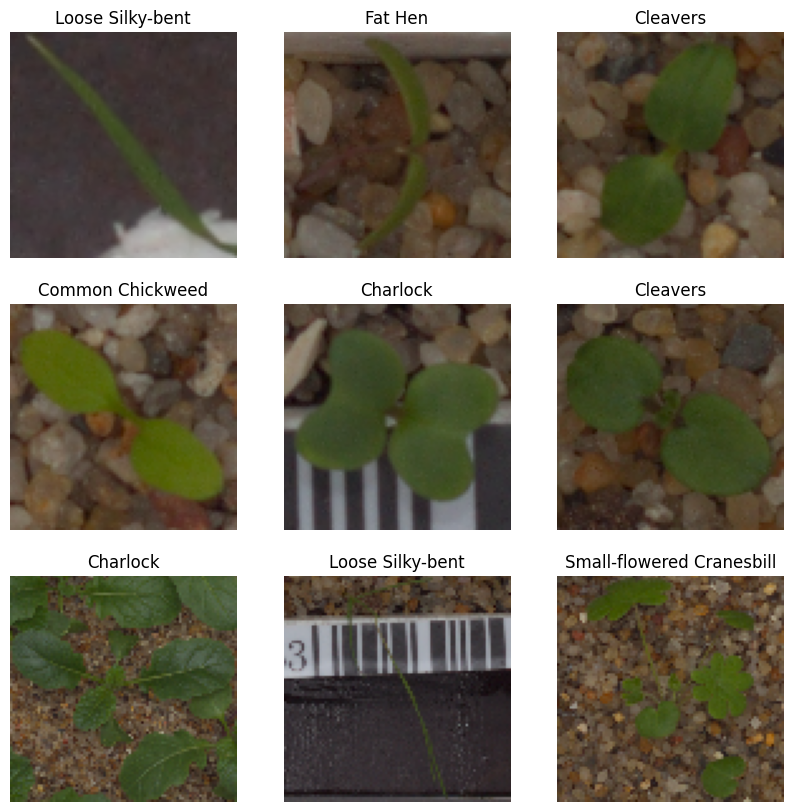

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Arquitectura (CNN) utilizando TensorFlow y Keras

In [5]:
# network using all the channels
model2 = Sequential([
  layers.Rescaling(1./255, input_shape=(desire_size[0], desire_size[1], 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(11)
])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Usaremos **model.summary()** para ver si está correcto

In [6]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 90, 90, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 90, 90, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 45, 45, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)        0

In [7]:
epochs=10
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
7/7 [==============================] - 14s 2s/step - loss: 2.3599 - accuracy: 0.1261 - val_loss: 2.3503 - val_accuracy: 0.1988
Epoch 2/10
7/7 [==============================] - 11s 2s/step - loss: 2.3218 - accuracy: 0.1543 - val_loss: 2.2957 - val_accuracy: 0.1729
Epoch 3/10
7/7 [==============================] - 11s 2s/step - loss: 2.2230 - accuracy: 0.2389 - val_loss: 2.1268 - val_accuracy: 0.2894
Epoch 4/10
7/7 [==============================] - 12s 2s/step - loss: 1.9554 - accuracy: 0.3326 - val_loss: 1.8331 - val_accuracy: 0.3435
Epoch 5/10
7/7 [==============================] - 12s 2s/step - loss: 1.6579 - accuracy: 0.4143 - val_loss: 1.5617 - val_accuracy: 0.4624
Epoch 6/10
7/7 [==============================] - 12s 2s/step - loss: 1.4449 - accuracy: 0.4884 - val_loss: 1.3553 - val_accuracy: 0.5212
Epoch 7/10
7/7 [==============================] - 11s 2s/step - loss: 1.3287 - accuracy: 0.5398 - val_loss: 1.2977 - val_accuracy: 0.5365
Epoch 8/10
7/7 [==================

In [8]:
epochs=5
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
7/7 [==============================] - 11s 2s/step - loss: 0.9818 - accuracy: 0.6688 - val_loss: 0.9823 - val_accuracy: 0.6671
Epoch 2/5
7/7 [==============================] - 11s 2s/step - loss: 0.9465 - accuracy: 0.6820 - val_loss: 0.9462 - val_accuracy: 0.6682
Epoch 3/5
7/7 [==============================] - 11s 2s/step - loss: 0.8983 - accuracy: 0.6923 - val_loss: 0.9330 - val_accuracy: 0.6894
Epoch 4/5
7/7 [==============================] - 11s 2s/step - loss: 0.8740 - accuracy: 0.7020 - val_loss: 0.8846 - val_accuracy: 0.7106
Epoch 5/5
7/7 [==============================] - 11s 2s/step - loss: 0.8017 - accuracy: 0.7361 - val_loss: 0.8611 - val_accuracy: 0.7329


In [9]:
epochs=3
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3
7/7 [==============================] - 11s 2s/step - loss: 0.7791 - accuracy: 0.7376 - val_loss: 0.8077 - val_accuracy: 0.7600
Epoch 2/3
7/7 [==============================] - 11s 2s/step - loss: 0.7253 - accuracy: 0.7629 - val_loss: 0.7919 - val_accuracy: 0.7376
Epoch 3/3
7/7 [==============================] - 11s 2s/step - loss: 0.6935 - accuracy: 0.7743 - val_loss: 0.7648 - val_accuracy: 0.7694


### Archivo para submit

In [10]:
x_obb_c =[]
file_ob=[]
for file in glob.glob("data\\test\\*"):
    im = Image.open(file)
    imf_resis= im.resize(desire_size)
    x_obb_c.append(np.array(imf_resis))
    file_ob.append(file.split("\\")[2])

In [11]:
y_hat = []
img_array = None
for f in file_ob:
    img= tf.keras.utils.load_img(
        f"data/test/{f}", target_size=desire_size
    )
    img_array= tf.keras.utils.img_to_array(img)
    img_array= tf.expand_dims(img_array, 0)
    predicciones = model2.predict(img_array)
    score = tf.nn.softmax(predicciones[0])
    y_hat.append(score.numpy())

1/1 [==============================] - 0s 16ms/step


In [12]:
df_oob = pd.DataFrame(data= zip(file_ob,[class_names[l] for l in np.argmax(y_hat,axis=1)]),
                        columns=["file","species"])
df_oob.to_csv("data/prediction_modelB222.csv", index=False)